# Machine Learning Project

### Load the data into a dataframe

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv("Train.csv")
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
1,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
2,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
3,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
4,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0


In [5]:
from sklearn.preprocessing import OneHotEncoder
def transform(data, column_name):
    # so that the WHOIS_COUNTRY column is the same each run
    data[column_name] = pd.read_csv("Train.csv")[column_name]

    data[column_name] = data[column_name].apply(lambda x: str(x).upper())
    data[column_name] = data[column_name].str.replace('UNITED KINGDOM', 'UK', case= False) 
    data[column_name] = data[column_name].fillna("NONE")
    X= data[column_name]
    index  = 0
    array = []
    for name in list(X.value_counts().index):
        array.append([name, index])
        index += 1

    COUNTRY_enc = OneHotEncoder(drop='first').fit(array)

    country_dictionary = {}
    cats = COUNTRY_enc.categories_[0]
    indices = COUNTRY_enc.categories_[1]
    for cat, index in zip(cats, indices):
        country_dictionary[cat] = index


    countries = [[country, country_dictionary[country]] for country in list(data[column_name].fillna("NONE"))]
    data[column_name] = [x[1] for x in countries]


## Transform the categorical features

### Transform CHARSET

In [6]:
# so that the WHOIS_COUNTRY column is the same each run
data["CHARSET"] = pd.read_csv("Train.csv")["CHARSET"]
transform(data, "CHARSET")

### Transform URL

In [7]:
# so that the WHOIS_COUNTRY column is the same each run
data["URL"] = pd.read_csv("Train.csv")["URL"]
transform(data, "URL")

### Transform WHOIS_STATEPRO

In [8]:
# so that the WHOIS_STATEPRO column is the same each run
data["WHOIS_STATEPRO"] = pd.read_csv("Train.csv")["WHOIS_STATEPRO"]
transform(data, "WHOIS_STATEPRO")

### Transform SERVER

In [9]:
# so that the WHOIS_COUNTRY column is the same each run
data["SERVER"] = pd.read_csv("Train.csv")["SERVER"]
transform(data, "SERVER")
#TODO need to convert float values to string

### Transform WHOIS_COUNTRY

In [10]:
# so that the WHOIS_COUNTRY column is the same each run
data["WHOIS_COUNTRY"] = pd.read_csv("Train.csv")["WHOIS_COUNTRY"]
transform(data, "WHOIS_COUNTRY")

### Detect the features most correlated with type

In [11]:
data_transformed = data.drop(["WHOIS_REGDATE", "WHOIS_UPDATED_DATE"], axis=1)
#data_transformed = (data_transformed-data_transformed.mean())/data_transformed.std()
data_transformed.corr()["Type"]

URL                          0.544331
URL_LENGTH                   0.150140
NUMBER_SPECIAL_CHARACTERS    0.262379
CHARSET                      0.028940
SERVER                      -0.155668
CONTENT_LENGTH              -0.098117
WHOIS_COUNTRY               -0.223252
WHOIS_STATEPRO               0.012171
TCP_CONVERSATION_EXCHANGE   -0.048396
DIST_REMOTE_TCP_PORT        -0.077496
REMOTE_IPS                  -0.067438
APP_BYTES                   -0.011302
SOURCE_APP_PACKETS          -0.040544
REMOTE_APP_PACKETS          -0.037299
SOURCE_APP_BYTES            -0.058839
REMOTE_APP_BYTES            -0.011090
APP_PACKETS                 -0.040544
DNS_QUERY_TIMES              0.062952
Type                         1.000000
Name: Type, dtype: float64

#### The most correlated ones are: 
- "URL"
- "URL_LENGTH"
- "NUMBER_SPECIAL_CHARACTERS"
- "WHOIS_COUNTRY"

<AxesSubplot:>

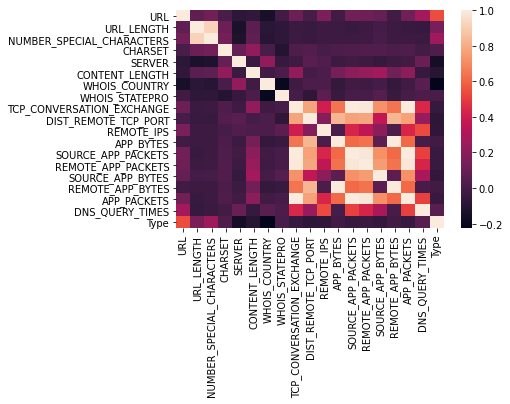

In [12]:
sns.heatmap(data.corr())

### Using PCA for data visualisation
##### In order to be able to create 2 dimensional plots, we use the principal component analysis reduction technique on the top 4 correlated features

Text(0.5, 1.0, 'PCA reduced data')

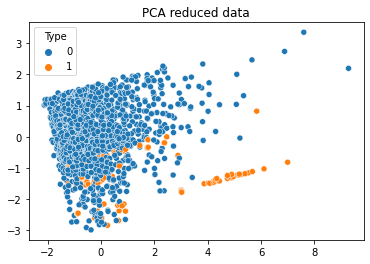

In [13]:
from sklearn.decomposition import PCA
from  seaborn import scatterplot

pca = PCA(n_components=2)
col=data[["URL", "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "WHOIS_COUNTRY"]]
col = (col-col.mean())/col.std()

sc= pca.fit_transform(col)
plt= scatterplot(x=[x[0] for x in sc],y=[x[1]for x in sc],hue=data["Type"])
plt.set_title('PCA reduced data')

### Detect NAs in the numerical features

In [14]:
print("NAs present in NUMBER_SPECIAL_CHARACTERS:", any(data["NUMBER_SPECIAL_CHARACTERS"].isna()))
print("NAs present in URL_LENGTH:", any(data["URL_LENGTH"].isna()))

NAs present in NUMBER_SPECIAL_CHARACTERS: False
NAs present in URL_LENGTH: False


In [17]:
# take the highest correlated rows
X = data_transformed[["URL", "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "WHOIS_COUNTRY", "Type"]]

# take all rows with class 1
class_1 = X[X["Type"] == 1]

# get amount of class 1s
n_class_1 = len(class_1)

# randomly sample rows with Type 0 n_class_1 times
class_0 = X[X["Type"] == 0].sample(n=n_class_1, random_state=1)

# join the two into one final dataframe 
X = pd.concat([class_1, class_0])

# extract the class and features
Y = X["Type"]
X = X.drop(["Type"], axis=1)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

LR = LogisticRegression().fit(X_train, y_train)
print("The accuracy on the test set is", accuracy_score(y_test, LR.predict(X_test)))

The accuracy on the test set is 1.0


### The accuracy achieved is 100%
##### Just using a Logistic regression model trained on the top 4 highest correlated features and equally distributed classes. We further try to implement an oversampling method called SMOTE to compare the results

### The data has a class imbalance problem

In [5]:
print("Number of rows with class 0 is", len(data[data["Type"] == 0]))
print("Number of rows with class 1 is", len(data[data["Type"] == 1]))

Number of rows with class 0 is 1272
Number of rows with class 1 is 159


### Sample the same number of examples from class 1 and 0

In [24]:
# take all rows with class 1
class_1 = data[data["Type"] == 1]

# get amount of class 1s
n_class_1 = len(class_1)

# randomly sample rows with Type 0 n_class_1 times
class_0 = data[data["Type"] == 0].sample(n=n_class_1*3, random_state=1)

# join the two into one final dataframe 
X = pd.concat([class_1, class_0])[["URL", "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "WHOIS_COUNTRY", "Type"]]

# extract the class and features
Y = X["Type"]
X = X.drop(["Type"], axis=1)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### To fix the class imbalance problem we implemented SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from collections import Counter

# convert the data into arrays for SMOTE
X = X_train
y_train = y_train.to_numpy() 
y = y_train

# creates the SMOTE objects, fits and oversamples them
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)


"""
counter = Counter(y)
 

for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()"""

'\ncounter = Counter(y)\n \n\nfor label, _ in counter.items():\n\trow_ix = where(y == label)[0]\n\tpyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))\npyplot.legend()\npyplot.show()'

#### The Logistic regression in this case throws a failure to converge warning, we use a support vector machine and random forest classifier instead

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC as SupportVectorMachine
# Splits into train and test set and trains two models
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

RFC = RandomForestClassifier().fit(X_train, y_train)
SVC = SupportVectorMachine().fit(X_train, y_train)

In [41]:
# Test the accuracy on the SMOTE validation set
print(accuracy_score(y_validation, SVC.predict(X_validation)))
print(accuracy_score(y_validation, RFC.predict(X_validation)))

0.9655172413793104
1.0


In [42]:
# test the accuracy on the non-SMOTE test set
print(accuracy_score(y_test, RFC.predict(X_test)))
print(accuracy_score(y_test, SVC.predict(X_test)))

0.9947643979057592
0.9476439790575916


### Conclusion
##### Using highly correlated features, and a subset of the training set of size ~300 we obtain 100% accuracy on predictions 
##### Further testing out the SMOTE oversampling method and training using a Random Forest Classifier and Support Vector Machine, we obtain the accuracy of 99% and 95% respectively